# Title: "STM Topics by Race and Class."
Description: "Goal is to estimate associations between topics in 28-topic STM model and race and class covariates at school and district levels." <br/>
Author: "Jaren Haber"

# Load libraries

In [1]:
install.packages(c("pacman"))

#devtools::install_github("mikajoh/stmprinter")
#devtools::install_github("rstudio/shiny")
#devtools::install_github("cschwem2er/stminsights")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [13]:
# import libraries
pacman::p_load(
          devtools, 
          rsvd, 
          geometry, 
          #Rtsne, 
          broom, 
          magrittr, 
          knitr,
          zoo,
          foreign,
          ggplot2,
          plyr,
          reshape2, 
          tidyr,
          dplyr,
          tm, 
          tau, 
          tidyverse, 
          quanteda, 
          SnowballC,
          stringr,
          #readtext,
          stringi,
          igraph,
          #stminsights,
          furrr,
          #wordcloud, 
          #shiny, 
          tidystm, # not available for # 3.6.1 - how to fix?
          tidytext, # package for tidy text
          stm, # package for structural topic modeling
          #stmprinter, 
          #stminsights,
          #stmCorrViz, 
          #LDAvis, 
          kableExtra) # for awesome tables

Warning message:
“package ‘tidystm’ is not available (for R version 3.6.1)”Warning message in p_install(package, character.only = TRUE, ...):
“”Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tidystm’”Warning message in pacman::p_load(devtools, rsvd, geometry, broom, magrittr, knitr, :
“Failed to install/load:
tidystm”

# Load Model Selection Image

## 28 topics (selected)

In [3]:
#load in the stm objects from RData file
load('/home/jovyan/work/swarm/output/stm_select28_allvars_image.RData')

In [4]:
#Display the stats from the top 4 models in charterSelect
#charterSelect

In [5]:
#plot semantic coherence vs exclusivity of the individual topics and average of each model 
#plotModels(charterSelect, pch=c(1,2,3,4,5), legend.position="bottomright")

In [6]:
#save the best model to text_analysis/topic_modeling 
model28 <- charterSelect$runout[[2]]
#save(model, file='/home/jovyan/work/text_analysis/topic_modeling/charterSelectBestModel.RData')

In [7]:
#Shows the top 50 words for each topic according to Highest, FREX, Lift, and Score measures with Frex =.7
top_words <- labelTopics(model28, n=50, frexweight = .7)
top_words

Topic 1 Top Words:
 	 Highest Prob: student, cours, school, high, colleg, credit, requir, onlin, class, program, educ, inform, graduat, complet, career, test, learn, english, enrol, year, grade, offer, applic, work, take, help, studi, need, plan, parent, attend, univers, state, resourc, option, must, meet, schedul, person, provid, admiss, transcript, scienc, contact, opportun, includ, avail, semest, advanc, elect 
 	 FREX: cours, credit, transcript, semest, test, onlin, algebra, elect, requir, colleg, gilbert, english, creek, graduat, complet, offer, technic, exam, sat, advanc, take, queen, placement, homeschool, tradit, class, counselor, virtual, guidanc, biolog, session, option, advisor, career, accredit, independ, earn, catalog, riversid, high, coursework, vendor, dual, student, studi, admiss, geometri, choic, transfer, per 
 	 Lift: edgenu, gilbert, concurr, plato, riversid, fastweb, cours, pre-calculus, glendal, ncaa, cosmetolog, laurel, weld, placer, transcript, psat, automot, qu

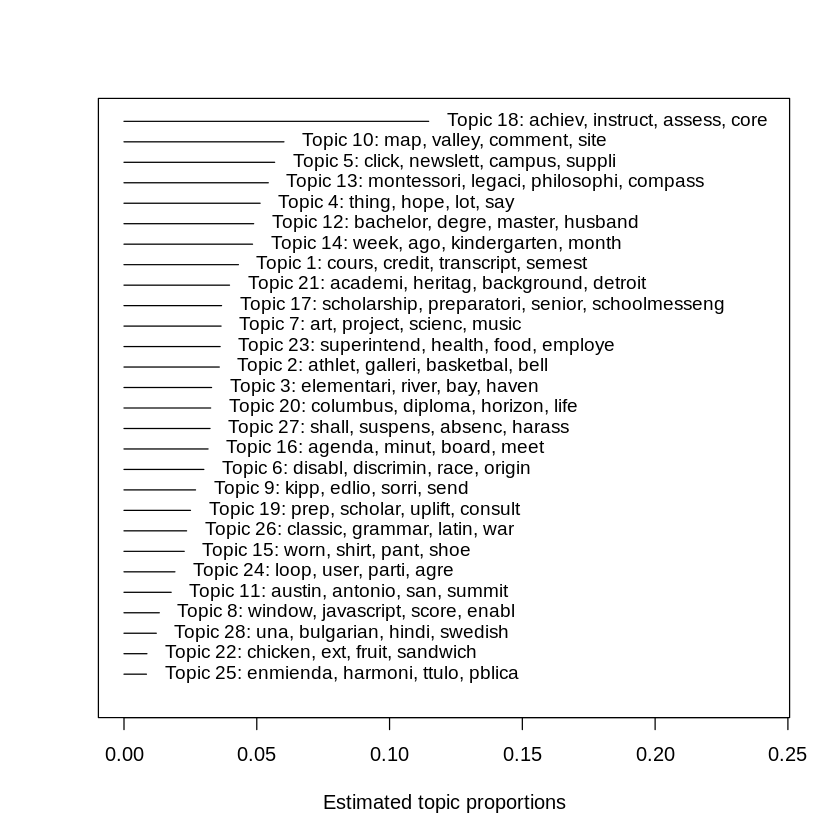

In [8]:
plot(model28, type = "summary", n = 4, xlim = c(0, 0.241), text.cex = 0.9485, 
     main = "", xlab = "Estimated topic proportions", labeltype = "frex", frexw = 0.7)

# Estimate Topic Relationships with Race & Class

### School level
Use the best model to estimate the significance of relationship (correlation, really) between each topic and school enrollments by race and class.

In [9]:
# Optional: Controls for EstimateEffect (exclude state)
# urban + primary middle + high + numpdfs + lnage + lnstudents

In [10]:
# Function for converting p.value into asterisks:
signif.num <- function(x) {
    symnum(x, corr = FALSE, na = FALSE, legend = FALSE,
           cutpoints = c(0, 0.001, 0.01, 0.05, 0.1, 1), 
           symbols = c("***", "**", "*", ".", " "))
}

In [11]:
# White student enrollment x Topics
white_effect <- estimateEffect(~ white_students + 
                               urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                               model28, meta = meta, uncertainty = "Global")
summary(white_effect)


Call:
estimateEffect(formula = ~white_students + urban + primary + 
    middle + high + numpdfs + lnage + lnstudents, stmobj = model28, 
    metadata = meta, uncertainty = "Global")


Topic 1:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0389319  0.0099942   3.895 9.93e-05 ***
white_students  0.0354503  0.0046163   7.679 1.91e-14 ***
urban          -0.0020136  0.0029555  -0.681    0.496    
primary        -0.0489802  0.0034137 -14.348  < 2e-16 ***
middle         -0.0326384  0.0048051  -6.792 1.23e-11 ***
high            0.0212541  0.0042059   5.053 4.50e-07 ***
numpdfs         0.0004743  0.0003639   1.303    0.193    
lnage          -0.0005501  0.0014004  -0.393    0.694    
lnstudents      0.0024410  0.0015828   1.542    0.123    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Topic 2:

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.0099345  0.0087554   1.135  0.25657    
wh

In [14]:
# Save to fresh CSV
tidy_frame <- tidy(white_effect) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figurestidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce estimates to three significant digits
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
keepcols = c("topic", "term", "estimate", "signif") # Define columns to keep
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.csv(tidy_frame,'/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv') # Save new DF to CSV
tidy_frame # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,white_students,0.035473567,***
2,white_students,-0.017077209,***
3,white_students,0.001612585,
4,white_students,0.022791759,***
5,white_students,0.008377522,.
6,white_students,-0.004990207,
7,white_students,0.028173713,***
8,white_students,0.003753051,
9,white_students,-0.038006272,***


In [15]:
# Black student enrollment x Topics
black_effect <- estimateEffect(~ black_students + 
                               urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                               model28, meta = meta, uncertainty = "Global")
#summary(black_effect)

# Clean up and append to existing CSV for topic/covariate associations for k=28
tidy_frame <- tidy(black_effect) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figurestidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figures
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.table(tidy_frame, '/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv', sep = ",", 
            col.names = !file.exists('/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv'), 
            append = T) # Append to existing CSV

head(tidy_frame) # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,black_students,-0.021247131,***
2,black_students,0.014034260,***
3,black_students,0.005206466,
4,black_students,-0.012150241,***
5,black_students,0.003192369,
6,black_students,0.001026148,


In [16]:
# Hispanic student enrollment x Topics
hispanic_effect <- estimateEffect(~ hispanic_students +
                                  urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                                  model28, meta = meta, uncertainty = "Global")
#summary(hispanic_effect)

# Clean up and append to existing CSV for topic/covariate associations for k=28
tidy_frame <- tidy(hispanic_effect) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figurestidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.table(tidy_frame, '/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv', sep = ",", 
            col.names = !file.exists('/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv'), 
            append = T) # Append to existing CSV

head(tidy_frame) # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,hispanic_students,-0.009596087,*
2,hispanic_students,0.002736362,
3,hispanic_students,-0.006661504,
4,hispanic_students,-0.008958226,*
5,hispanic_students,-0.012598970,**
6,hispanic_students,0.003082688,


In [17]:
# Asian student enrollment x Topics
asian_effect <- estimateEffect(~ asian_students +
                               urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                               model28, meta = meta, uncertainty = "Global")
#summary(asian_effect)

# Clean up and append to existing CSV for topic/covariate associations for k=28
tidy_frame <- tidy(asian_effect) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figurestidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.table(tidy_frame, '/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv', sep = ",", 
            col.names = !file.exists('/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv'), 
            append = T) # Append to existing CSV

head(tidy_frame) # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,asian_students,-0.011973254,
2,asian_students,-0.007968790,
3,asian_students,-0.009871864,
4,asian_students,-0.010253669,
5,asian_students,0.004767310,
6,asian_students,0.005483127,


In [18]:
# School poverty (FRPL) x Topics
poverty <- estimateEffect(~ poor_students + 
                          urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                          model28, meta = meta, uncertainty = "Global")
#summary(poverty)

# Clean up and append to existing CSV for topic/covariate associations for k=28
tidy_frame <- tidy(poverty) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figures
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.table(tidy_frame, '/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv', sep = ",", 
            col.names = !file.exists('/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv'), 
            append = T) # Append to existing CSV

head(tidy_frame) # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,poor_students,-2.990592e-04,***
2,poor_students,7.805375e-05,.
3,poor_students,2.511931e-05,
4,poor_students,-1.680715e-04,***
5,poor_students,-7.059687e-05,.
6,poor_students,1.660067e-06,


### School district level
Estimate relationships between topics and school district race and poverty.

In [19]:
# White district proportion x Topics
white_district <- estimateEffect(~ white_district +
                                 urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                                 model28, meta = meta, uncertainty = "Global")
#summary(white_district)

# Clean up and append to existing CSV for topic/covariate associations for k=28
tidy_frame <- tidy(white_district) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figurestidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figures
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.table(tidy_frame, '/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv', sep = ",", 
            col.names = !file.exists('/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv'), 
            append = T) # Append to existing CSV

head(tidy_frame) # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,white_district,4.234225e-04,***
2,white_district,-9.179680e-05,
3,white_district,-7.075151e-05,
4,white_district,1.441098e-04,*
5,white_district,1.669915e-04,*
6,white_district,-6.190859e-05,


In [20]:
# Black district proportion x Topics
black_district <- estimateEffect(~ black_district + 
                                 urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                                 model28, meta = meta, uncertainty = "Global")
#summary(black_district)

# Clean up and append to existing CSV for topic/covariate associations for k=28
tidy_frame <- tidy(black_district) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figurestidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figures
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.table(tidy_frame, '/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv', sep = ",", 
            col.names = !file.exists('/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv'), 
            append = T) # Append to existing CSV

head(tidy_frame) # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,black_district,-4.022525e-04,***
2,black_district,1.088639e-04,
3,black_district,2.479484e-04,***
4,black_district,-2.416315e-04,***
5,black_district,-1.583496e-05,
6,black_district,2.352008e-04,**


In [21]:
# Hispanic district proportion x Topics
hispanic_district <- estimateEffect(~ hispanic_district + 
                                    urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                                    model28, meta = meta, uncertainty = "Global")
#summary(hispanic_district)

# Clean up and append to existing CSV for topic/covariate associations for k=28
tidy_frame <- tidy(hispanic_district) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figurestidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figures
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.table(tidy_frame, '/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv', sep = ",", 
            col.names = !file.exists('/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv'), 
            append = T) # Append to existing CSV

head(tidy_frame) # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,hispanic_district,-0.22669870,
2,hispanic_district,0.05537132,
3,hispanic_district,-0.02659759,
4,hispanic_district,0.01323675,
5,hispanic_district,-0.48835717,.
6,hispanic_district,0.56822883,.


In [22]:
# Asian district proportion x Topics
asian_district <- estimateEffect(~ asian_district + 
                                 urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                                 model28, meta = meta, uncertainty = "Global")
#summary(asian_district)

# Clean up and append to existing CSV for topic/covariate associations for k=28
tidy_frame <- tidy(asian_district) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figurestidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figures
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.table(tidy_frame, '/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv', sep = ",", 
            col.names = !file.exists('/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv'), 
            append = T) # Append to existing CSV

head(tidy_frame) # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,asian_district,-4.753787e-05,
2,asian_district,1.154764e-04,
3,asian_district,-3.881153e-04,*
4,asian_district,3.271379e-04,*
5,asian_district,-4.978524e-04,**
6,asian_district,-3.298883e-04,


In [23]:
# Poverty district proportion x Topics
poverty_district <- estimateEffect(~ poverty_district + 
                                   urban + primary + middle + high + numpdfs + lnage + lnstudents, 
                                   model28, meta = meta, uncertainty = "Global")
#summary(poverty_district)

# Clean up and append to existing CSV for topic/covariate associations for k=28
tidy_frame <- tidy(poverty_district) # Tidy up output
#toDel <- seq(1, nrow(tidy_frame), 2); tidy_frame <- tidy_frame[ -toDel ,] # keep only coeffs and p.values, NO controls: Capture even rows
toKeep <- seq(2, nrow(tidy_frame), 9); tidy_frame <- tidy_frame[ toKeep,] # keep only coeffs and p.values, WITH controls: Capture every 2nd row from start in batches of 9tidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figurestidy_frame$estimate <- format(tidy_frame$estimate, digits=3) # Reduce to 3 significant figures
tidy_frame$signif <- signif.num(tidy_frame$p.value) # Derive asterisks from p.value
tidy_frame <- tidy_frame[keepcols] # Drop unnecessary columns
write.table(tidy_frame, '/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv', sep = ",", 
            col.names = !file.exists('/home/jovyan/work/swarm/output/estimate_effects_controls_k28.csv'), 
            append = T) # Append to existing CSV

head(tidy_frame) # Look at clean results

topic,term,estimate,signif
<int>,<chr>,<dbl>,<noquote>
1,poverty_district,-9.288445e-04,***
2,poverty_district,-1.623430e-04,
3,poverty_district,6.726602e-05,
4,poverty_district,-9.066742e-04,***
5,poverty_district,-3.817937e-04,*
6,poverty_district,4.107353e-04,.


## Visualize topics x race/class relationships

### 'Academics' cluster of topics

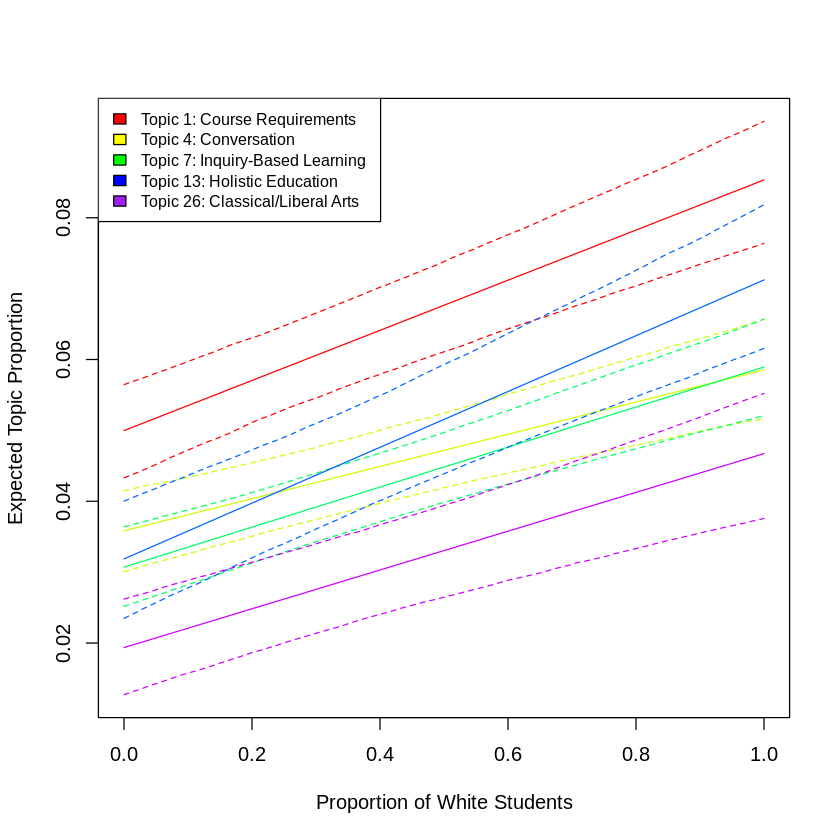

In [24]:
# effect of Academics Cluster topics on proportion of white students
x2="Proportion of White Students"
title2="Effect of Academics Cluster Topics on White Student Proportion"
legend2=c("Topic 1: Course Requirements", "Topic 4: Conversation", "Topic 7: Inquiry-Based Learning", "Topic 13: Holistic Education", "Topic 26: Classical/Liberal Arts")
plot(white_effect, covariate="white_students", topics=c(1, 4, 7, 13, 26), method="continuous", xlab=x2, printlegend=FALSE) #main=title2,
legend(x="topleft", legend=legend2, fill=c("red", "yellow", "green", "blue", "purple"), cex=0.8)


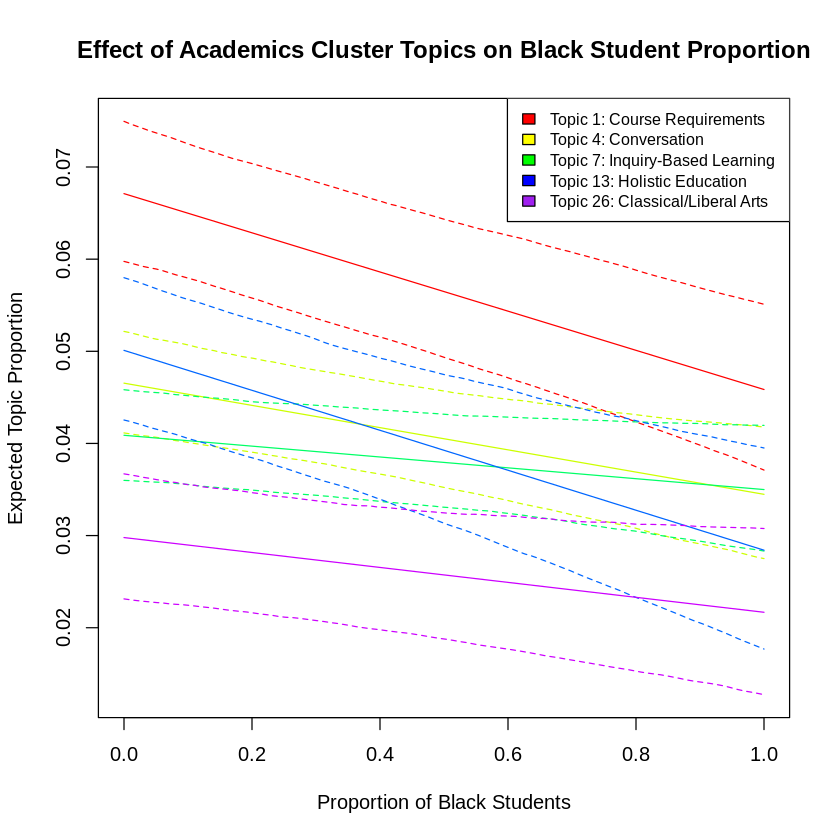

In [25]:
# effect of Academics Cluster topics on proportion of black students
x1="Proportion of Black Students"
title1="Effect of Academics Cluster Topics on Black Student Proportion"
legend1=c("Topic 1: Course Requirements", "Topic 4: Conversation", "Topic 7: Inquiry-Based Learning", "Topic 13: Holistic Education", "Topic 26: Classical/Liberal Arts")
plot(black_effect, covariate="black_students", topics=c(1, 4, 7, 13, 26), method="continuous", main=title1, xlab=x1, printlegend=FALSE)
legend(x="topright", legend=legend1, fill=c("red", "yellow", "green", "blue", "purple"), cex=0.8)


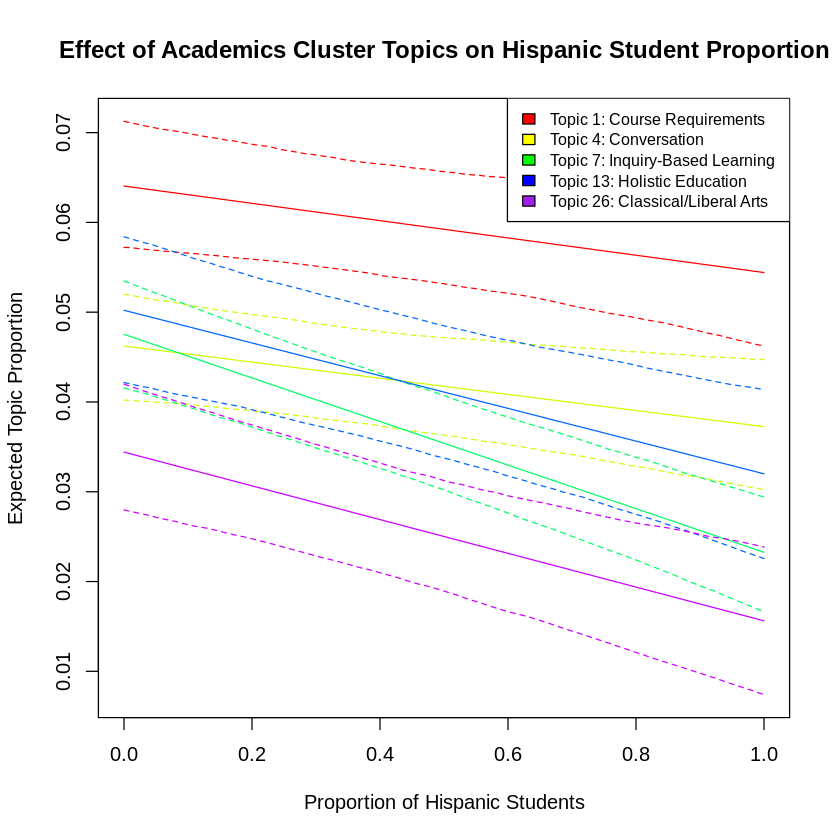

In [26]:
# effect of Academics Cluster topics on proportion of hispanic students
x1="Proportion of Hispanic Students"
title1="Effect of Academics Cluster Topics on Hispanic Student Proportion"
legend1=c("Topic 1: Course Requirements", "Topic 4: Conversation", "Topic 7: Inquiry-Based Learning", "Topic 13: Holistic Education", "Topic 26: Classical/Liberal Arts")
plot(hispanic_effect, covariate="hispanic_students", topics=c(1, 4, 7, 13, 26), method="continuous", main=title1, xlab=x1, printlegend=FALSE)
legend(x="topright", legend=legend1, fill=c("red", "yellow", "green", "blue", "purple"), cex=0.8)


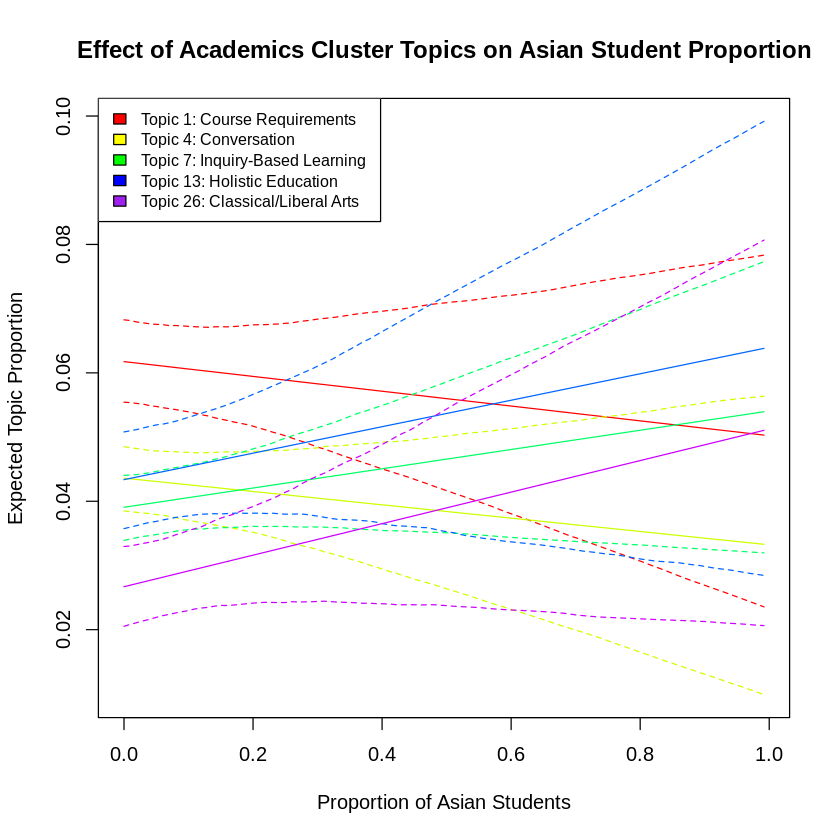

In [27]:
# effect of Academics Cluster topics on proportion of asian students
x3="Proportion of Asian Students"
title3="Effect of Academics Cluster Topics on Asian Student Proportion"
legend3=c("Topic 1: Course Requirements", "Topic 4: Conversation", "Topic 7: Inquiry-Based Learning", "Topic 13: Holistic Education", "Topic 26: Classical/Liberal Arts")
plot(asian_effect, covariate="asian_students", topics=c(1, 4, 7, 13, 26), method="continuous", main=title3, xlab=x3, printlegend=FALSE)
legend(x="topleft", legend=legend3, fill=c("red", "yellow", "green", "blue", "purple"), cex=0.8)


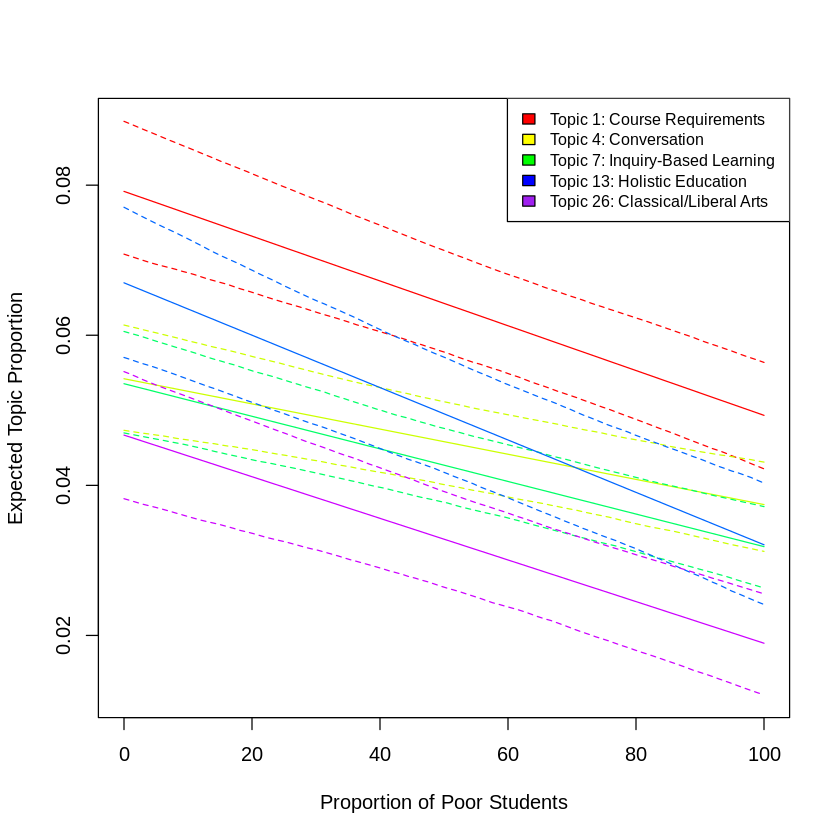

In [28]:
# effect of Academics Cluster topics on proportion of poor students
x3="Proportion of Poor Students"
title10="Effect of Academics Cluster Topics on Poor Student Proportion"
legend3=c("Topic 1: Course Requirements", "Topic 4: Conversation", "Topic 7: Inquiry-Based Learning", "Topic 13: Holistic Education", "Topic 26: Classical/Liberal Arts")
plot(poverty, covariate="poor_students", topics=c(1, 4, 7, 13, 26), method="continuous", xlab=x3, printlegend=FALSE) #main=title10, 
legend(x="topright", legend=legend3, fill=c("red", "yellow", "green", "blue", "purple"), cex=0.8)


### 'Standards/College-Bound' cluster of topics

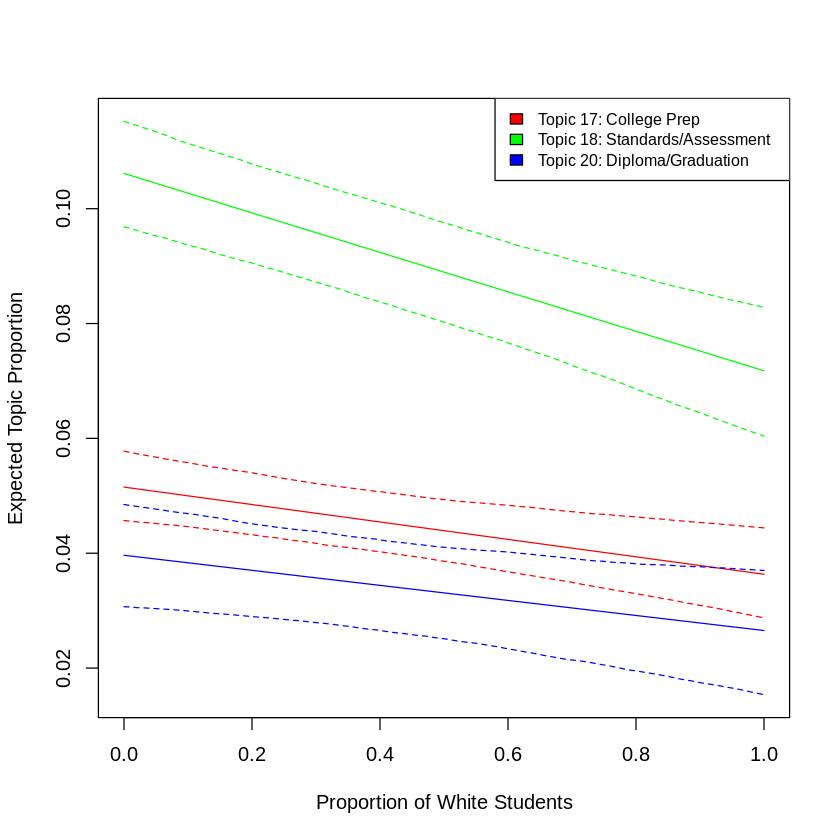

In [29]:
# effect of Standards/College-Bound Cluster topics on proportion of white students
x5="Proportion of White Students"
title5="Effect of Standards/College-Bound Cluster Topics on White Student Proportion"
legend5=c("Topic 17: College Prep", "Topic 18: Standards/Assessment", "Topic 20: Diploma/Graduation")
plot(white_effect, covariate="white_students", topics=c(17, 18, 20), method="continuous", xlab=x5, printlegend=FALSE, cex.main=1) #main=title5, 
legend(x="topright", legend=legend5, fill=c("red", "green", "blue"), cex=0.8)


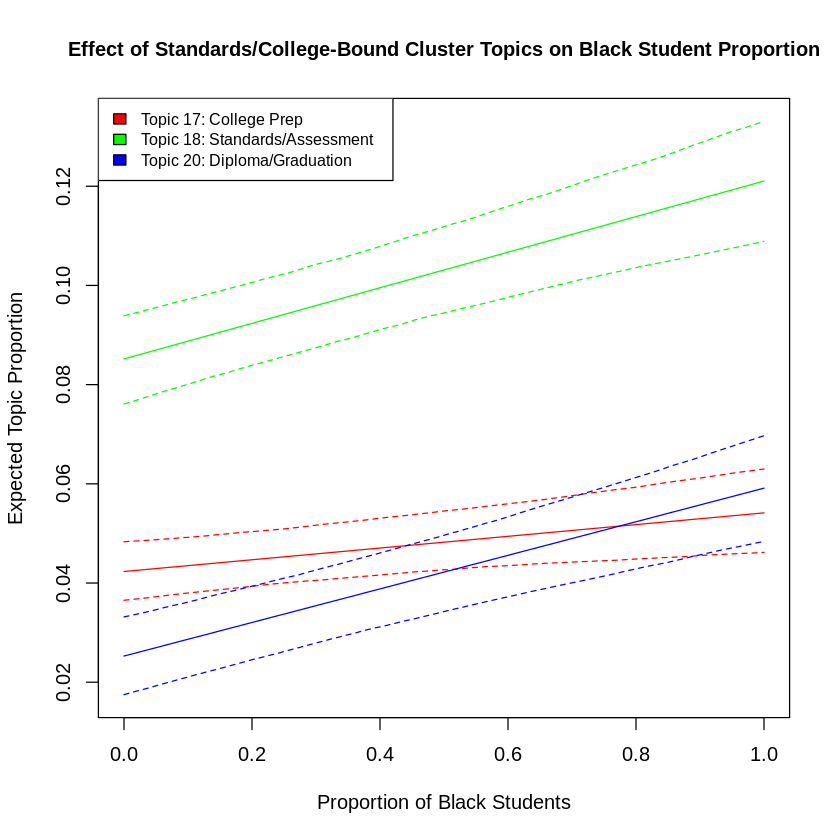

In [30]:
# effect of Standards/College-Bound Cluster topics on proportion of black students
x4="Proportion of Black Students"
title4="Effect of Standards/College-Bound Cluster Topics on Black Student Proportion"
legend4=c("Topic 17: College Prep", "Topic 18: Standards/Assessment", "Topic 20: Diploma/Graduation")
plot(black_effect, covariate="black_students", topics=c(17, 18, 20), method="continuous", main=title4, xlab=x4, cex.main=1, printlegend=FALSE)
legend(x="topleft", legend=legend4, fill=c("red", "green", "blue"), cex=0.8)


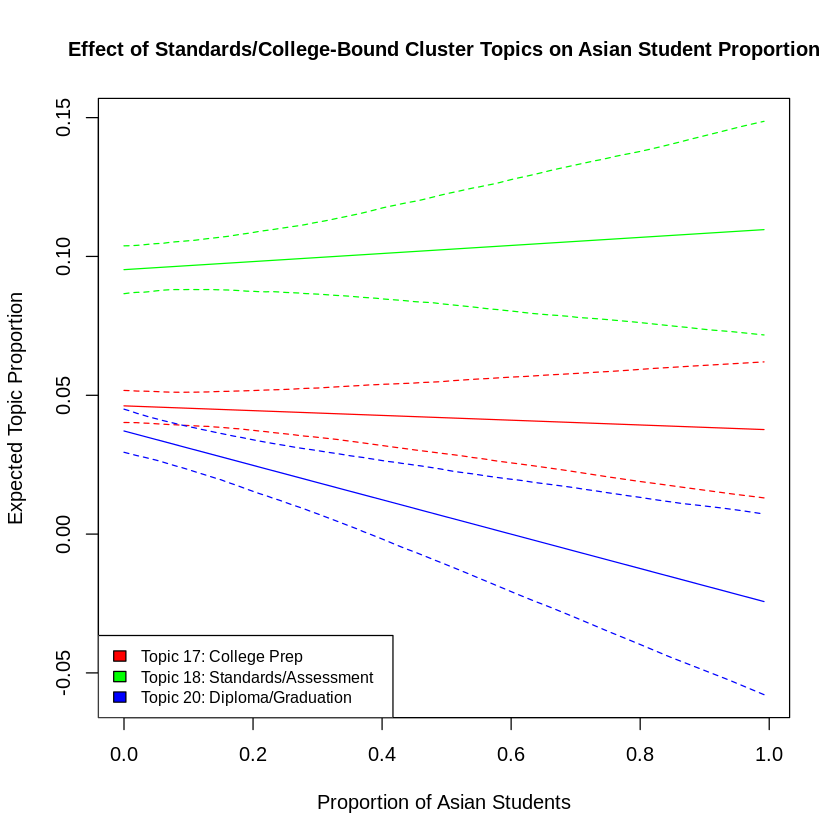

In [31]:
# effect of Standards/College-Bound Cluster topics on proportion of asian students
x6="Proportion of Asian Students"
title6="Effect of Standards/College-Bound Cluster Topics on Asian Student Proportion"
legend6=c("Topic 17: College Prep", "Topic 18: Standards/Assessment", "Topic 20: Diploma/Graduation")
plot(asian_effect, covariate="asian_students", topics=c(17, 18, 20), method="continuous", main=title6, xlab=x6, printlegend=FALSE, cex.main=1)
legend(x="bottomleft", legend=legend6, fill=c("red", "green", "blue"), cex=0.8)


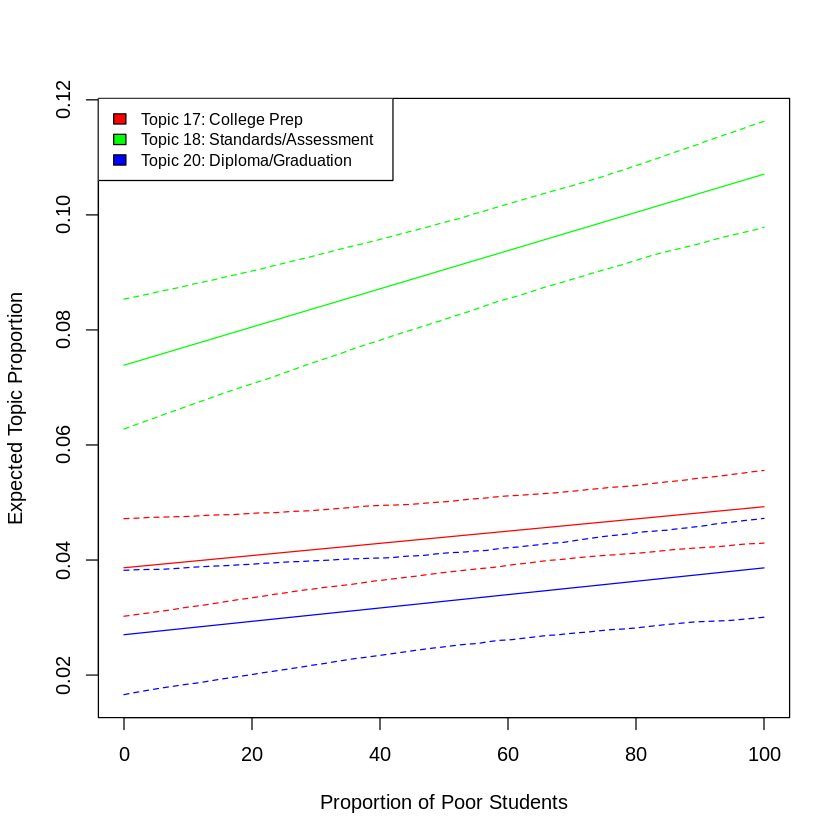

In [32]:
# effect of Standards/College-Bound Cluster topics on proportion of poor students
x6="Proportion of Poor Students"
title6="Effect of Standards/College-Bound Cluster Topics on Poor Student Proportion"
legend6=c("Topic 17: College Prep", "Topic 18: Standards/Assessment", "Topic 20: Diploma/Graduation")
plot(poverty, covariate="poor_students", topics=c(17, 18, 20), method="continuous", xlab=x6, printlegend=FALSE, cex.main=1) #main=title6
legend(x="topleft", legend=legend6, fill=c("red", "green", "blue"), cex=0.8)


### 'Serving the Disadvantaged' cluster of topics

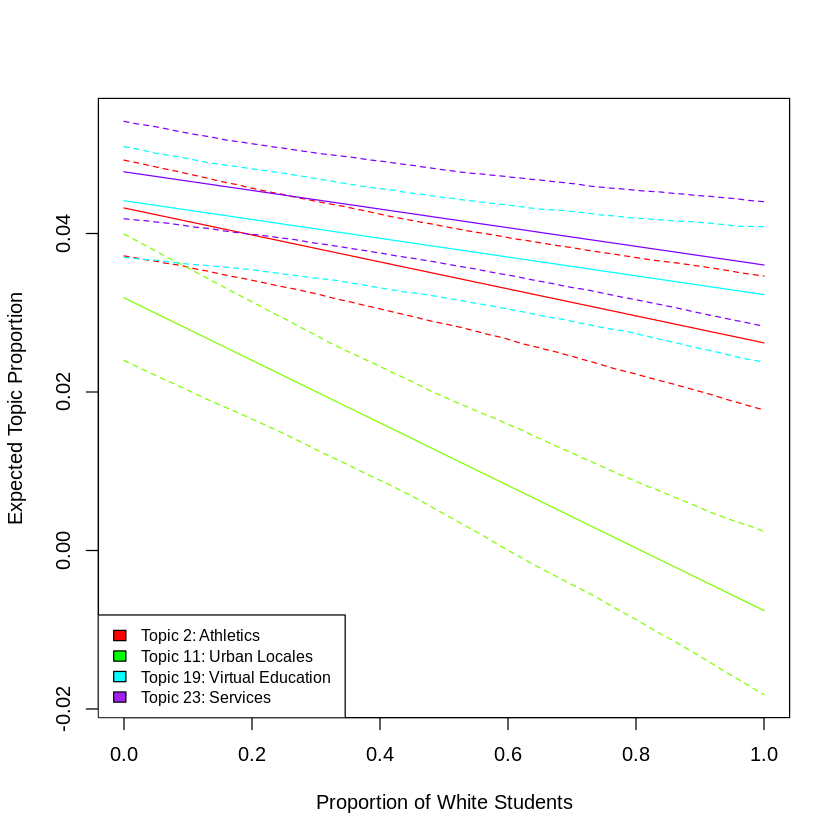

In [33]:
# effect of Serving the Disadvantaged Cluster topics on proportion of white students
x8="Proportion of White Students"
title8="Effect of Serving the Disadvantaged Cluster Topics on White Student Proportion"
legend8=c("Topic 2: Athletics", "Topic 11: Urban Locales", "Topic 19: Virtual Education", "Topic 23: Services")
plot(white_effect, covariate="white_students", topics=c(2, 11, 19, 23), method="continuous", xlab=x8, printlegend=FALSE, cex.main=1) #main=title8, 
legend(x="bottomleft", legend=legend8, fill=c("red", "green", "cyan", "purple"), cex=0.8)


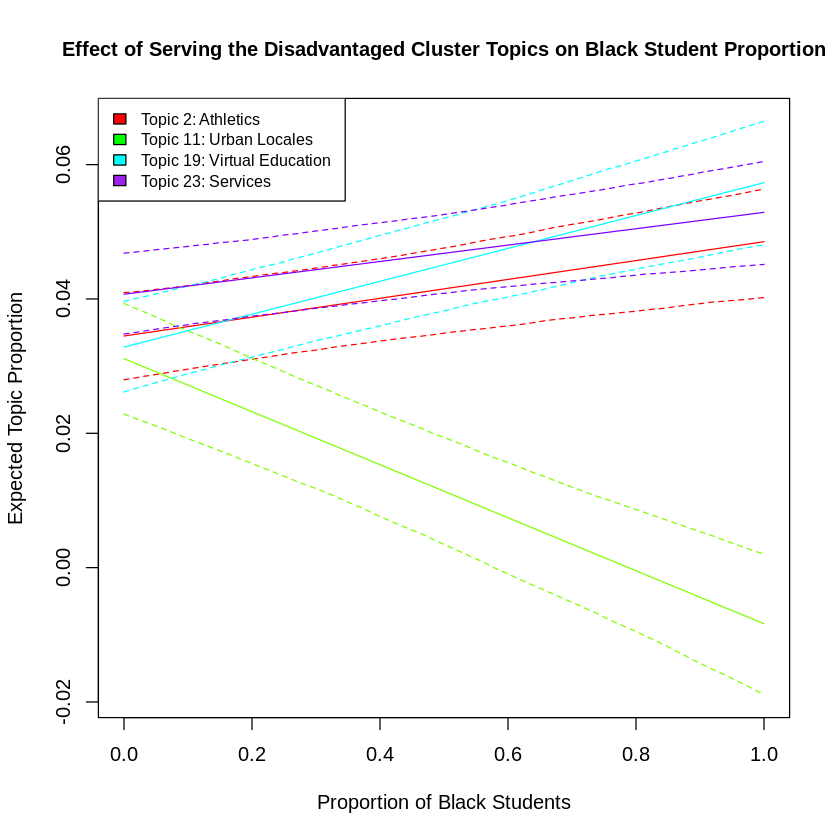

In [34]:
# effect of Serving the Disadvantaged Cluster topics on proportion of black students
x7="Proportion of Black Students"
title7="Effect of Serving the Disadvantaged Cluster Topics on Black Student Proportion"
legend7=c("Topic 2: Athletics", "Topic 11: Urban Locales", "Topic 19: Virtual Education", "Topic 23: Services")
plot(black_effect, covariate="black_students", topics=c(2, 11, 19, 23), method="continuous", main=title7, xlab=x7, printlegend=FALSE, cex.main=1)
legend(x="topleft", legend=legend7, fill=c("red", "green", "cyan", "purple"), cex=0.8)


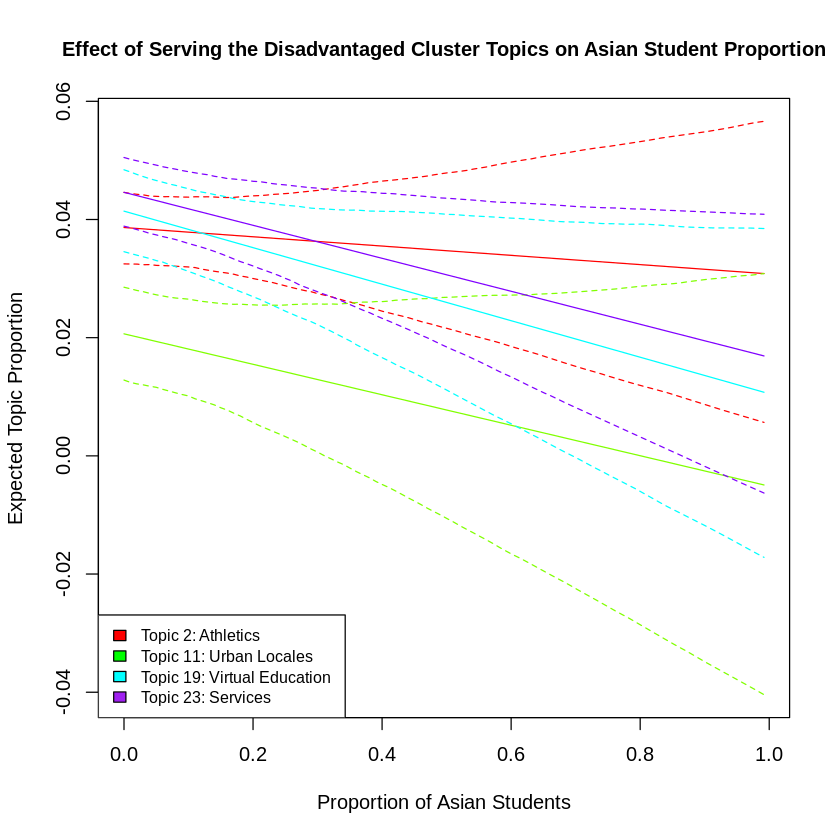

In [38]:
# effect of Serving the Disadvantaged Cluster topics on proportion of asian students
x9="Proportion of Asian Students"
title9="Effect of Serving the Disadvantaged Cluster Topics on Asian Student Proportion"
legend9=c("Topic 2: Athletics", "Topic 11: Urban Locales", "Topic 19: Virtual Education", "Topic 23: Services")
plot(asian_effect, covariate="asian_students", topics=c(2, 11, 19, 23), method="continuous", main=title9, xlab=x9, printlegend=FALSE, cex.main=1)
legend(x="bottomleft", legend=legend9, fill=c("red", "green", "cyan", "purple"), cex=0.8)


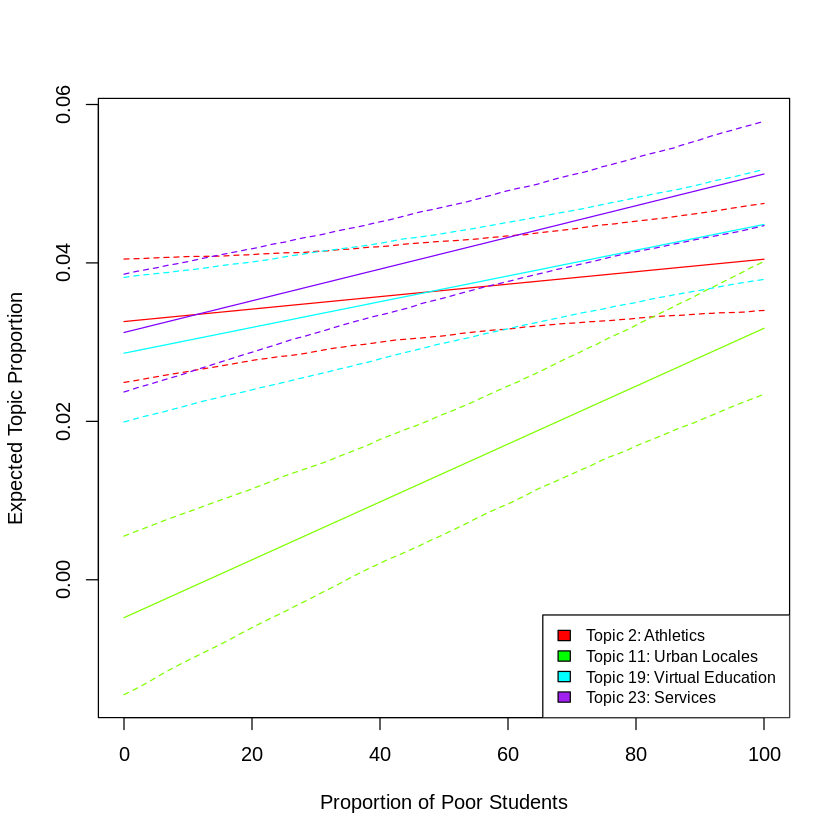

In [37]:
# effect of Serving the Disadvantaged Cluster topics on proportion of poor students
x9="Proportion of Poor Students"
title9="Effect of Serving the Disadvantaged Cluster Topics on Poor Student Proportion"
legend9=c("Topic 2: Athletics", "Topic 11: Urban Locales", "Topic 19: Virtual Education", "Topic 23: Services")
plot(poverty, covariate="poor_students", topics=c(2, 11, 19, 23), method="continuous", xlab=x9, printlegend=FALSE, cex.main=1) #main=title9, 
legend(x="bottomright", legend=legend9, fill=c("red", "green", "cyan", "purple"), cex=0.8)


# Save Image

In [ ]:
#save.image(file='/home/jovyan/work/text_analysis/topic_modeling/estimateEffectData.RData')